<a href="https://colab.research.google.com/github/eatidal/HR-Analytics-Job-Change-of-Data-Scientists/blob/main/Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping the NBA Website of the Week Players Data Into a CSV File

In [1]:
# import request & beautiful soup
# request is for getting content from a URL
# beautiful soup is used to parse through the HTML we get from requests

import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
r = requests.get('https://basketball.realgm.com/nba/awards/by-type/Player-Of-The-Week/30')
r.content

b'<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n   <head>\r\n      <meta http-equiv="content-type" content="text/html; charset=utf-8">\n<title>NBA Player Of The Week - NBA Awards - RealGM</title>\n<meta name="keywords" content="NBA Player Of The Week, NBA Awards, RealGM">\n<meta name="description" content="NBA Player Of The Week - NBA Awards - RealGM">\n<meta property="og:title" content="NBA Player Of The Week - NBA Awards - RealGM" />\n<meta property="og:type" content="website" />\n<meta property="og:url" content="https://basketball.realgm.com/nba/awards/by-type/Player-Of-The-Week/30" />\n<meta property="og:description" content="NBA Player Of The Week - NBA Awards - RealGM" />\n<meta property="article:publisher" content="https://w

In [3]:
soup = BeautifulSoup(r.content)

In [10]:
# add table column names
columns = ['Season', 'Player Name',	'Conference',	'Date',	'Team',	'Pos', 'Height',	'Weight',	'Age', 'Pre-Draft Team',	'Draft Yr',	'YOS']

In [11]:
# create df with columns name
df=pd.DataFrame(columns=columns)

In [12]:
# prepare to scrap table
table = soup.find('table', attrs={'class': 'tablesaw', 'data-tablesaw-mode' : 'swipe'}).tbody
trs = table.find_all('tr')

In [13]:
for tr in trs:
  tds = tr.find_all('td')
  row = [td.text.replace('\n','') for td in tds]
  df = df.append(pd.Series(row,index= columns), ignore_index=True)

# save data as .csv
df.to_csv('NBA Player Of The Week Recipients.csv.csv', index= False)
df

,Season,Player Name,Conference,Date,Team,Pos,Height,Weight,Age,Pre-Draft Team,Draft Yr,YOS
0,2020-2021,Giannis Antetokounmpo,East,"Mar 1, 2021",Milwaukee Bucks,F,6-11,242,26,Filathlitikos Div II Greece (Greece),2013,7
1,2020-2021,Devin Booker,West,"Mar 1, 2021",Phoenix Suns,SG,6-6,206,24,Kentucky,2015,5
2,2020-2021,James Harden,East,"Feb 22, 2021",Brooklyn Nets,SG,6-5,220,31,Arizona State,2009,11
3,2020-2021,Damian Lillard,West,"Feb 22, 2021",Portland Trail Blazers,G,6-3,195,30,Weber State,2012,8
4,2020-2021,Saddiq Bey,East,"Feb 15, 2021",Detroit Pistons,F,6-8,215,21,Villanova,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1979-1980,Phil Ford,,"Nov 18, 1979",Kansas City Kings,G,6-2,175,24,North Carolina,1978,1
1360,1979-1980,Magic Johnson,,"Nov 11, 1979",Los Angeles Lakers,PG,6-9,255,20,Michigan State,1979,0
1361,1979-1980,Marques Johnson,,"Nov 4, 1979",Milwaukee Bucks,GF,6-7,218,24,UCLA,1977,2
1362,1979-1980,Micheal Ray Richardson,,"Oct 28, 1979",New York Knicks,PG,6-5,189,24,Montana,1978,1


## EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          1364 non-null   object
 1   Player Name     1364 non-null   object
 2   Conference      1364 non-null   object
 3   Date            1364 non-null   object
 4   Team            1364 non-null   object
 5   Pos             1364 non-null   object
 6   Height          1364 non-null   object
 7   Weight          1364 non-null   object
 8   Age             1364 non-null   object
 9   Pre-Draft Team  1364 non-null   object
 10  Draft Yr        1364 non-null   object
 11  YOS             1364 non-null   object
dtypes: object(12)
memory usage: 128.0+ KB


In [33]:
df.describe(exclude= 'number')

,Season,Player Name,Conference,Date,Team,Pos,Height,Age,Pre-Draft Team,Draft Yr,YOS
count,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
unique,42,338,3,928,37,11,21,22,169,53,18
top,2002-2003,LeBron James,,"Jan 12, 2003",Los Angeles Lakers,G,6-8,25,St. Vincent St. Mary High School (Ohio),2003,4
freq,47,64,501,3,88,203,148,177,64,120,170


Text(0.5, 1.0, 'Counts the Conference')

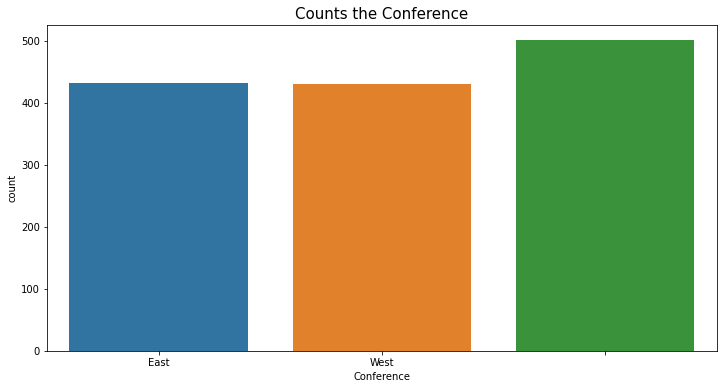

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x=df.Conference).set_title("Counts the Conference", size=15)

Text(0.5, 1.0, 'Distributional of Age')

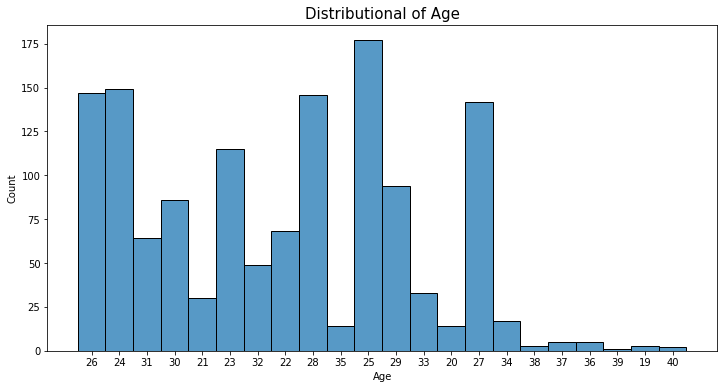

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x=df.Age).set_title("Distributional of Age", size=15)

In [15]:
df['Weight']= df['Weight'].astype(int)

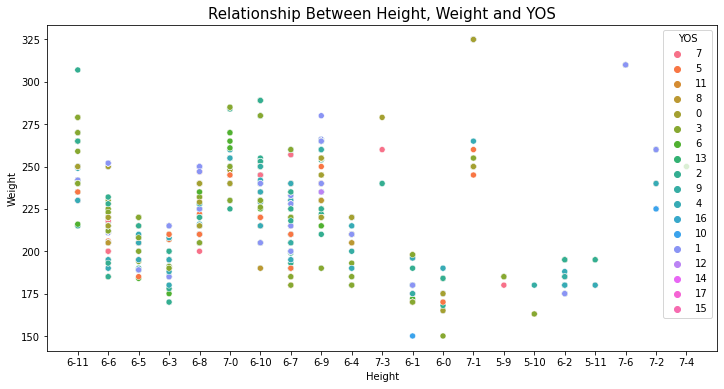

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x=df.Height, y=df.Weight,
                hue=df.YOS).set_title("Relationship Between Height, Weight and YOS", size=15)
plt.show()